### Interacting with data in Jupyter Notebook

In [29]:
import requests
import pandas as pd

In [30]:
def get_historic_price(symbol, after='2018-09-01'):
    
    url = 'https://api.kraken.com/0/public/OHLC'
    pair = f"{symbol.upper()}USD" # XBTUSD when symbol='xbt' for example
    
    resp = requests.get(url, params={
        "pair": pair,
        'interval': 60,
        'since': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    
    data = resp.json()
    
    results_key = [k for k in data['result'].keys() if k != 'last'][0]
    results = [
        (close_time, float(open), float(high), float(low), float(close), float(volume))
        for (close_time, open, high, low, close, vwap, volume, count)
        in data['result'][results_key]
    ]
    df = pd.DataFrame(results, columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

I will now pull data from Bitcon and Ether, two of the most popular cryptocurrencies, for last 7 days.

In [31]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2024-04-05 21:49:36.582749')

In [32]:
btc = get_historic_price('btc', after=last_week)

In [33]:
eth = get_historic_price('eth', after=last_week)

In [34]:
btc.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
count,165.000000,165.000000,165.000000,165.00000,165.000000
mean,69759.777576,69977.047879,69509.913939,69751.99697,120.033260
std,1195.961502,1209.119905,1223.958970,1213.25696,139.974170
min,67584.400000,67770.100000,65118.000000,66348.50000,7.890741
25%,69047.400000,69203.200000,68716.400000,69047.40000,36.596690
50%,69518.200000,69800.000000,69331.900000,69529.60000,71.832649
75%,70653.400000,70889.000000,70500.000000,70660.10000,144.080559
max,72351.300000,72731.500000,72203.000000,72351.20000,904.308328


In [35]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
CloseTime,,,,,
2024-04-05 22:00:00,67584.4,67851.7,67584.4,67636.8,33.725261
2024-04-05 23:00:00,67661.0,67971.0,67660.9,67856.5,18.431039
2024-04-06 00:00:00,67856.5,68043.0,67738.6,67955.6,32.119727
2024-04-06 01:00:00,67955.6,67999.1,67700.0,67745.0,36.478014
2024-04-06 02:00:00,67745.0,67815.0,67513.7,67626.8,12.624727


<Axes: xlabel='CloseTime', ylabel='Price'>

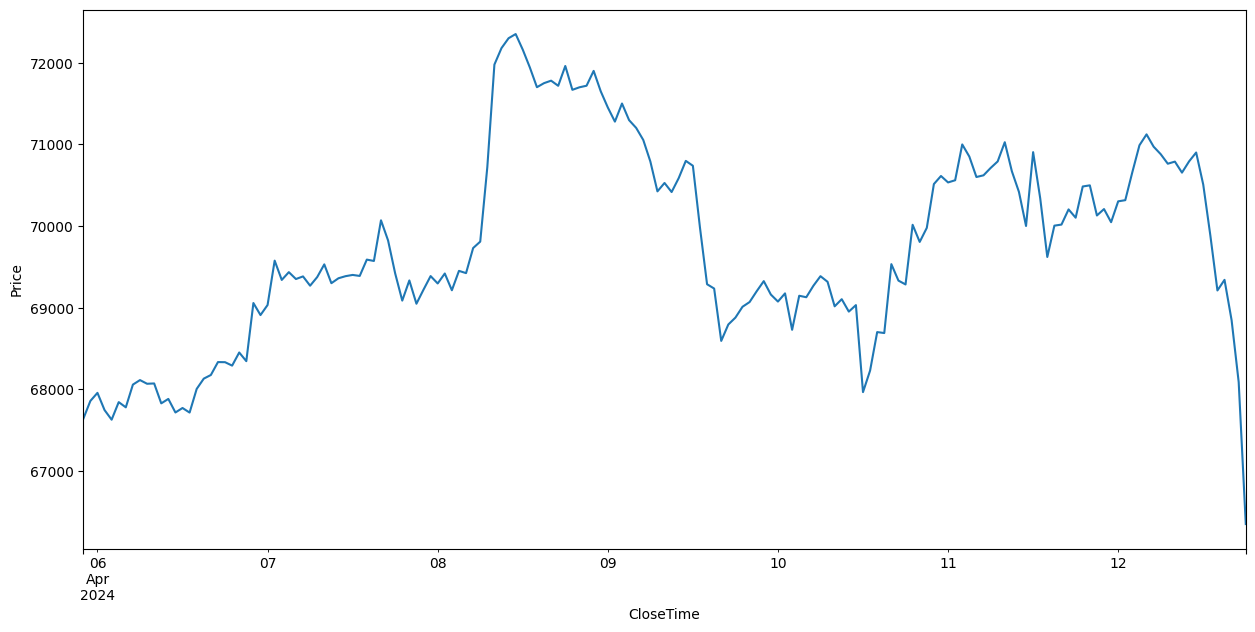

In [36]:
btc['ClosePrice'].plot(figsize=(15,7),ylabel='Price')

In [37]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
CloseTime,,,,,
2024-04-05 22:00:00,3322.70,3328.03,3312.93,3315.84,156.525967
2024-04-05 23:00:00,3315.84,3327.57,3315.64,3320.55,110.876968
2024-04-06 00:00:00,3320.55,3339.88,3312.88,3326.11,1033.375770
2024-04-06 01:00:00,3326.73,3332.20,3315.75,3319.70,123.316967
2024-04-06 02:00:00,3319.96,3327.60,3310.00,3324.52,80.147708


### Bonus: Dynamic plots with Bokeh
Bokeh is a plotting library that generates interactive plots, that can be manipualted right within your browser.

In [38]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [39]:
output_notebook()

Loading BokehJS ...

In [44]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend_label='Bitcoin')
#p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = "top_left"

show(p1)

#legend= declared and you have to use legend_label

### Exporting to Excel
Working with Excel and other formats is extremly simple in Jupyter Lab.

In [47]:
writer = pd.ExcelWriter('cryptos.xlsx')

In [52]:
btc.to_excel(writer, sheet_name='Bitcoin')

In [49]:
eth.to_excel(writer, sheet_name='Ether')

In [54]:
writer.close()
#Save() method declared in pandas use close